## Test multiple stardist models

Now that we received a second bee image we want to test generalization of the model to the second image.  

We look at three different results

1.  Testing result:  This is the result we get the first time we apply the model trained on previous data to this image.
2.  Validation result:  After testing we will likely notice errors.  At this stage we try tweaking the training process to improve the result (without adding this new image as training data (yet)).  For example if we notice we are hallucinating bees in the background, we may add more background patches (from the previous training images) and augment them more.
3.  Training result (self prediction):  Finally 

In [1]:
from skimage.io import imread
from tnia.plotting.plt_helper import random_label_cmap
from pathlib import Path
from skimage.io import imread
import matplotlib.pyplot as plt
from stardist.models import StarDist2D, Config2D
from tnia.plotting.plt_helper import imshow_multi2d

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


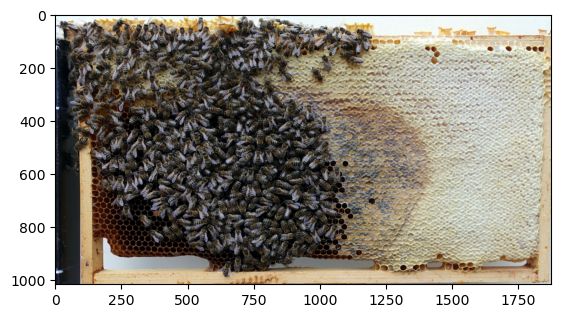

In [3]:

tnia_images_path = Path(r'D:\images')
parent_path=Path(tnia_images_path / r'tnia-python-images/imagesc/2023_12_20_segmenting_bees')
model_path = parent_path / 'model'
from csbdeep.utils import normalize

#test_name='bsp1-2.jpg'
test_name='bee1-s.tif'
testim = imread(parent_path  / test_name) 
testim = normalize(testim,1,99.8, axis=(0,1))

testim_crop = testim[150:800,:]
testim_crop = normalize(testim_crop,1,99.8, axis=(0,1))
plt.imshow(testim)

In [4]:
model1 = StarDist2D(config=None, name="model1", basedir=model_path)
model_aug = StarDist2D(config=None, name="model_aug_first_iteration", basedir=model_path)
model_uber = StarDist2D(config=None, name="model_uber", basedir=model_path)

Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.812629, nms_thresh=0.3.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.675842, nms_thresh=0.3.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.481877, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


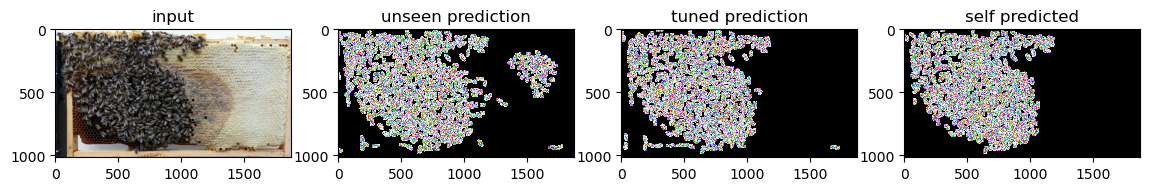

In [5]:
labels, details = model1.predict_instances(testim, prob_thresh=0.5, nms_thresh=0.1)
labels_aug, details_aug = model_aug.predict_instances(testim, prob_thresh=0.5, nms_thresh=0.1)
labels_uber, details_uber = model_uber.predict_instances(testim, prob_thresh=0.5, nms_thresh=0.1)

#fig = imshow_multi2d([testim,labels],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])
fig = imshow_multi2d([testim,labels,labels_aug,labels_uber],['input','unseen prediction','tuned prediction','self predicted'],1,4, width=14, height=8,colormaps=['gray', random_label_cmap(), random_label_cmap(), random_label_cmap()])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


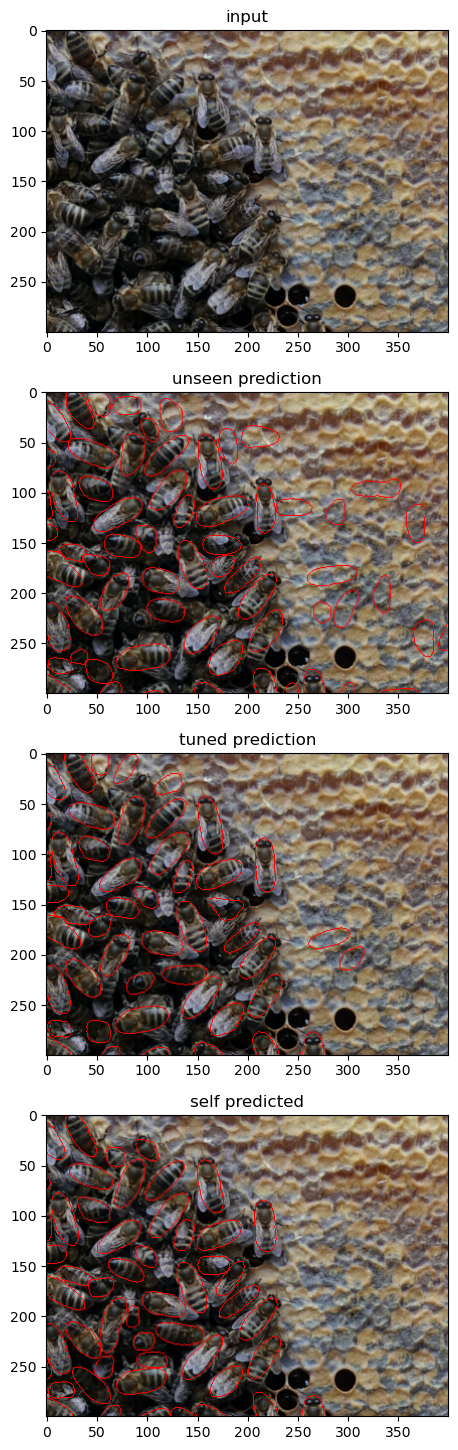

In [12]:
import numpy as np
from skimage.color import label2rgb
from skimage.segmentation import find_boundaries

ind = np.s_[300:600,800:1200]

def make_overlay(im, labels):
    overlay = im.copy()
    boundaries = find_boundaries(labels, mode='inner')
    overlay[boundaries] = [255,0,0]
    return overlay

overlay = make_overlay(testim, labels)
overlay_aug = make_overlay(testim, labels_aug)
overlay_uber = make_overlay(testim, labels_uber)

fig = imshow_multi2d([testim[ind],overlay[ind],overlay_aug[ind],overlay_uber[ind]],['input','unseen prediction','tuned prediction','self predicted'],4,1, width=12, height=18,colormaps=['gray', random_label_cmap(), random_label_cmap(), random_label_cmap()])

In [7]:
import napari
viewer = napari.Viewer()
viewer.add_image(testim, name='testim')
viewer.add_labels(labels, name='unseen-prediction (test)')
viewer.add_labels(labels_aug, name='tuned-prediction (validation)')
viewer.add_labels(labels_uber, name='self-prediction (train)')

<Labels layer 'self-prediction (train)' at 0x1c8e6d402b0>

In [23]:
base_name = test_name.split('.')[0]
print(base_name)

bee1-s


In [24]:
from skimage.io import imsave
import os

labels_path = parent_path / 'labels'

name = base_name + '-labels-corrected.tif'
imsave(labels_path / name , labels.astype('uint16'))

763085022.py (7): D:\images\tnia-python-images\imagesc\2023_12_20_segmenting_bees\labels\bee1-s-labels-corrected.tif is a low contrast image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


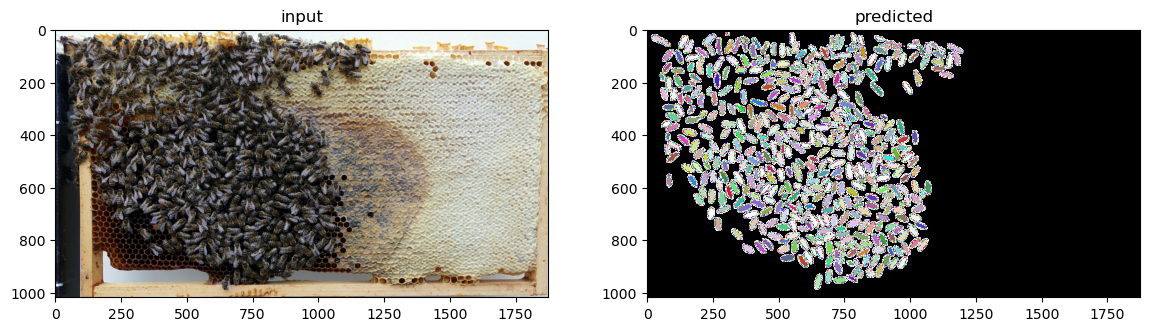

In [25]:
labels_test = imread( labels_path / name) 
fig = imshow_multi2d([testim,labels_test],['input','predicted'],1,2, width=14, height=8,colormaps=['gray', random_label_cmap()])